In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\Prudhvi'

In [3]:
os.chdir('C:\\Users\\Prudhvi\\Desktop')

In [10]:
import numpy as np
import pandas as pd
df = pd.read_csv('idiom_train_data.csv')
df.sample(10)

,DataID,Language,MWE,Setting,Previous,Target,Next,Label
2416,train_zero_shot.EN.1.5,EN,bankruptcy proceeding,zero_shot,"With Mallinckrodt now in bankruptcy, this agre...",We are also aggressively engaged in every aspe...,That includes our vocal opposition to the defi...,1
1902,train_zero_shot.EN.22.17,EN,basket case,zero_shot,These days the company is boasting about sanit...,Someone else will have to reinvent the nature ...,"It remains the first name in coworking, in spi...",0
224,train_zero_shot.EN.48.2,EN,law firm,zero_shot,This profession is about giving everyone a voi...,"As we continue to grow our team, I look forwar...",With over a decade of experience practicing la...,1
1008,train_zero_shot.EN.158.11,EN,double cross,zero_shot,"And to move forward with that, obviously, I sa...",But before he convinced me that I wanted to be...,"And don't take this the wrong way, he ended up...",1
4046,train_zero_shot.PT.337.11,PT,disco rígido,zero_shot,A diferença mais marcante entre um SSD e um HD...,Já foram produzidas diversas comparações que a...,E isso fica evidente não somente na inicializa...,0
1936,train_zero_shot.EN.178.13,EN,brick wall,zero_shot,Movie theaters shut down?,They pulled over the sofa and projected movies...,Working from one of the apartment’s two rooms ...,1
1324,train_zero_shot.EN.281.11,EN,hot potato,zero_shot,"Activists and stakeholders, for years disappoi...",The whole issue of immigration has been a hot ...,"Once they get elected, it’s like other things.",0
3526,train_zero_shot.PT.362.6,PT,livre-docente,zero_shot,A arquitetura popular e brasileira da italiana...,"Arquiteto urbanista (PUC-Campinas, 1985), Luis...",Responsável pela organização dos seminários in...,0
3460,train_zero_shot.PT.336.17,PT,direitos humanos,zero_shot,"No entanto, antes mesmo de os militares derrub...","A AI apontou ""sérias violações dos direitos hu...",Ataques aéreos indiscriminados mataram e ferir...,0
1990,train_zero_shot.EN.80.23,EN,social insurance,zero_shot,"Firstly, the employer’s mandatory social secur...","Secondly, social insurance can protect busines...","For example, where an employee suffers an inju...",1


In [11]:
df.shape


(4491, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DataID    4491 non-null   object
 1   Language  4491 non-null   object
 2   MWE       4491 non-null   object
 3   Setting   4491 non-null   object
 4   Previous  4491 non-null   object
 5   Target    4491 non-null   object
 6   Next      4489 non-null   object
 7   Label     4491 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 280.8+ KB


In [23]:
df.sample(5)

,Language,MWE,Previous,Target,Next,Label
2512,EN,health insurance,"Quana Madison, a disabled artist in Denver, Co...",She filed for bankruptcy due to debt from medi...,"During the coronavirus pandemic, Madison has c...",1
3109,EN,world conference,Organisers say they are hopeful the coronaviru...,Organisers of the International University Spo...,The Winter World University Games was due to t...,1
604,EN,music festival,Last year's lineup featured headliners Yeah Ye...,We've reached out to Pitchfork Music Festival ...,"In the meantime, what do we think: Will large ...",1
2495,EN,academy award,"""I think it's a possibility. It's not the sort...",He went on to reminisce about the night be rec...,"""I remember the night I got it,"" he recalled.",1
543,EN,football season,Five states stopped before state championships...,Hawaii has designs on beginning its high schoo...,Oregon is not restarting any high school sport...,1


In [28]:
df.duplicated().sum()

0

In [31]:
df['Label'].value_counts()

0    2535
1    1956
Name: Label, dtype: int64

([<matplotlib.patches.Wedge at 0x18e2547b5e0>,
 [Text(-0.22124596914787736, 1.077520404046168, 'non-idiom'),
  Text(0.22124596914787675, -1.077520404046168, 'idiom')],
 [Text(-0.12067961953520583, 0.5877384022070006, '56.45'),
  Text(0.12067961953520549, -0.5877384022070006, '43.55')])

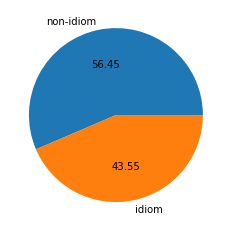

In [36]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(),labels=['non-idiom','idiom'],autopct='%0.2f')

In [37]:
import nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prudhvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
df['num_characters'] = df['Target'].apply(len)
df.sample(5)

,Language,MWE,Previous,Target,Next,Label,num_characters
2079,EN,silver screen,Silver was always going to be next.,The Gamestop traders dropped a big enough hint...,The biggest beneficiaries of that?,0,131
691,EN,grandfather clock,"In fact, the complimentary use of mortal and s...",This can be as simple as sending Marianne’s sp...,"That said, it’s not just the haunted souls of ...",0,386
1757,EN,web site,"Additionally, GreenVision will file other rele...",Copies may be obtained free of charge at the S...,Security holders of GreenVision are urged to r...,1,75
518,EN,radioactive material,Consequently if you keep the object far enough...,"However, as said, that depends from the amount...","Obviously, if you collect WWII compasses and a...",1,143
3392,PT,amigo secreto,"Em vez de idas aos shoppings, as compras onlin...",A popular brincadeira de amigo secreto sofreu ...,Veja sugestões de presentes gastronômicos para...,0,133


In [42]:
df['num_words'] = df['Target'].apply(lambda x : len(nltk.word_tokenize(x)));
df.sample(5)

,Language,MWE,Previous,Target,Next,Label,num_characters,num_words
2851,EN,rock bottom,The 77-minute 6-2 6-3 triumph ended a 15-year ...,It is almost four years ago that party-goer Ev...,"To his credit, the Brummie did not wallow in s...",0,174,34
1191,EN,tear gas,Zero percent of people should ever be poisoned...,The Cottonwood School of Civics and Science ha...,"We regularly find pellets, pepper balls and mu...",0,249,40
998,EN,double cross,For example the cut shows VJS with some sort o...,There also seems to be a game of double cross ...,Secen Screen Studios the producer of 'Tughlaq'...,0,160,35
2569,EN,field work,Urbint's technology seeks to give utilities an...,"Field work can be dangerous, and unfortunately...",That means it's up to utilities and other oper...,0,152,28
636,EN,eye candy,What makes this ring special is it’s the bride...,"This ring design is undoubtedly eye candy, mad...","Moreover, the blue metal staining and the cont...",0,80,17


In [43]:
df['num_sentences'] = df['Target'].apply(lambda x : len(nltk.sent_tokenize(x)));
df.sample(5)

,Language,MWE,Previous,Target,Next,Label,num_characters,num_words,num_sentences
4268,PT,vinho branco,"Peixes assados, como bacalhau, sardinha ou até...",Não é preciso sempre optar 100% das vezes pelo...,"Segundo Daniel, é possível investir em rótulos...",0,60,13,1
2218,EN,cocktail dress,While the 35-year-old star looked stunning for...,The cookbook author paired a sparkling green c...,"Thanks to a broken zipper, her jacket soon bec...",0,149,29,1
2485,EN,academy award,(Never visited? Don’t worry: An animated Dre g...,"And she’s in very good company, among notable ...",Dre is so spurred on by his wife’s achievement...,1,199,41,1
4394,PT,alta-costura,"Isso seria injusto, pouco ético e irresponsável.""","A grife, um dos grandes destaques da Semana de...","Apesar do formato 100% digital, a Semana de Al...",0,335,62,1
185,EN,brain drain,"Finally, since the coronavirus pandemic has a ...",Brain drain in Kosovo has and continues to be ...,Young men and women who struggled to access hi...,0,105,20,1


In [45]:
df[df['Label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2535.000000,2535.000000,2535.000000
mean,154.224063,29.783826,1.018146
std,73.201134,13.587675,0.203720
min,20.000000,4.000000,1.000000
25%,104.000000,20.000000,1.000000
50%,143.000000,28.000000,1.000000
75%,193.000000,37.000000,1.000000
max,673.000000,112.000000,5.000000


In [46]:
df[df['Label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1956.000000,1956.000000,1956.000000
mean,162.563906,30.487219,1.004601
std,73.899451,13.488589,0.067693
min,20.000000,5.000000,1.000000
25%,109.000000,21.000000,1.000000
50%,151.000000,29.000000,1.000000
75%,204.000000,37.000000,1.000000
max,710.000000,149.000000,2.000000


In [47]:
df.drop(columns=['num_words','num_sentences','num_characters'],inplace=True);
df.sample(5)

,Language,MWE,Previous,Target,Next,Label
2789,EN,radioactive waste,A wide range of robust solutions are either al...,The conference aims to foster information exch...,The Conference will also highlight the effecti...,1
2200,EN,cloud nine,The woman next to her bawled the whole time.,"She was calling everyone she knew, and people ...",Post felt like she’d won the lottery.,0
2062,EN,cocoa butter,Browne Director of Marketing.,"With this limited edition line, we're thrilled...","DJ Khaled, in addition to and perhaps even mor...",1
1093,EN,agony aunt,It is clear to anyone with a fifth-grade readi...,It is equally evident that people are still go...,"And while all this was going on, WUSA was putt...",0
2677,EN,role model,"The Harambee Stars forward, currently attached...","Robin Van Persie was my role model,"" he told b...",I feel I learnt something from van Persie and ...,0


In [64]:
df.head(5)

,Language,MWE,Previous,Target,Next,Label,traformed_target,transformed_previous
0,EN,double dutch,This inspired others to jump ropes as a leisur...,There are several theories behind the origin o...,The most popular theory states that “Double Du...,0,sever theori behind origin term doubl dutch,inspir other jump rope leisur activ exercis pa...
1,EN,double dutch,In the age of chivalry a man paid for the woma...,"Double Dutch also derives from the same era, D...",There are many phrases that include the word: ...,0,doubl dutch also deriv era dutch seem strang c...,age chivalri man paid woman dinner dutch incor...
2,EN,double dutch,"To her eternal credit, she kept both India and...",Since 1977 we have had a plethora of Foreign M...,We need to exclude from that list the late Mr ...,0,sinc 1977 plethora foreign minist subject fore...,etern credit kept india pakistan friend 1971 i...
3,EN,double dutch,While pharmaceutical companies were researchin...,Turns out that these people were speaking doub...,So why aren’t Big Macs sold all over the world...,0,turn peopl speak doubl dutch,pharmaceut compani research develop vaccin pro...
4,EN,double dutch,Coronavirus in Europe * Brexit * Brussels ...,Is Flemish premier talking double Dutch?,Three months before the Belgians take over the...,0,flemish premier talk doubl dutch,coronaviru europ brexit brussel playbook londo...


In [67]:
df.drop(columns=['traformed_target','transformed_previous'],inplace=True)

In [68]:
df.head(5)

,Language,MWE,Previous,Target,Next,Label
0,EN,double dutch,This inspired others to jump ropes as a leisur...,There are several theories behind the origin o...,The most popular theory states that “Double Du...,0
1,EN,double dutch,In the age of chivalry a man paid for the woma...,"Double Dutch also derives from the same era, D...",There are many phrases that include the word: ...,0
2,EN,double dutch,"To her eternal credit, she kept both India and...",Since 1977 we have had a plethora of Foreign M...,We need to exclude from that list the late Mr ...,0
3,EN,double dutch,While pharmaceutical companies were researchin...,Turns out that these people were speaking doub...,So why aren’t Big Macs sold all over the world...,0
4,EN,double dutch,Coronavirus in Europe * Brexit * Brussels ...,Is Flemish premier talking double Dutch?,Three months before the Belgians take over the...,0


In [69]:
pip install gensim

In [70]:
pip install python-levenshtein

  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.2-cp38-cp38-win_amd64.whl size=83405 sha256=3a6bd54cbc0f609b3d9cefcce99c6d83cbfae21d4e751e716da24d8a942da77a
  Stored in directory: c:\users\prudhvi\appdata\local\pip\cache\wheels\d7\0c\76\042b46eb0df65c3ccd0338f791210c55ab79d209bcc269e2c7
Successfully built python-levenshtein
Note: you may need to restart the kernel to use updated packages.


In [71]:
import gensim

In [72]:
df['transformed_target'] = df.Target.apply(gensim.utils.simple_preprocess)
df.sample(5)

,Language,MWE,Previous,Target,Next,Label,transformed_target
2120,EN,blind alley,"In contrast, hundreds of millions of people th...","This archaism is a blind alley, it is a road t...","According to him, ""the migration crisis in Eur...",0,"[this, archaism, is, blind, alley, it, is, roa..."
2985,EN,low profile,Another benefit of low-profile tyres is an imp...,Of course the opposite of a low profile tyre i...,You'll normally find these on basic cars and 4...,1,"[of, course, the, opposite, of, low, profile, ..."
4450,PT,relógio biológico,Seu nome científico é núcleo supraquiasmático ...,Ou até usar seu apelido mais pop: relógio biol...,Mas há quem desaprove a analogia.,0,"[ou, até, usar, seu, apelido, mais, pop, relóg..."
865,EN,nest egg,It was impossible not to just stick in savings...,It just made the most sense to be able to have...,"If there’s a third stimulus check, she intends...",0,"[it, just, made, the, most, sense, to, be, abl..."
808,EN,contact lens,"Johnson & Johnson, the country's largest lens ...",Three of the top four contact lens manufacture...,This means retailers and optometry providers w...,0,"[three, of, the, top, four, contact, lens, man..."


In [114]:
model = gensim.models.Word2Vec(
    window = 7,
    min_count = 0,
    workers = 4
)

In [115]:
model.build_vocab(df['transformed_target'],progress_per = 1000)
df.shape

(4491, 7)

model.epochs

In [116]:
model.train(df['transformed_target'],total_examples=model.corpus_count,epochs=model.epochs)


(475528, 559375)

In [117]:
x = model.wv['queen']
print(x)

[-3.51093970e-02  2.56928019e-02  3.87516525e-03  6.05541952e-02
 -2.05945168e-02 -1.10243581e-01  4.14177887e-02  1.39510065e-01
 -6.09142706e-02 -5.07325493e-02  4.30932976e-02 -6.88645765e-02
 -1.40257124e-02  4.64041233e-02 -1.72960467e-03 -2.24200860e-02
  6.56382143e-02  1.93704516e-02 -9.70068425e-02 -7.32400417e-02
  4.13899720e-02  5.40956259e-02  8.98480490e-02 -5.19675156e-03
  8.76558106e-03  1.87737998e-02 -6.16453849e-02  1.96858384e-02
 -6.73820823e-02  4.63987999e-02  5.98738752e-02 -2.85444153e-03
  6.87850118e-02 -6.72114342e-02 -3.98918800e-02  7.67682642e-02
  2.27022916e-02 -6.44002631e-02 -3.77825871e-02 -6.60909265e-02
 -4.36856635e-02 -3.00335865e-02 -4.14950289e-02 -2.23771967e-02
  4.41551022e-02 -6.37607127e-02 -4.62664552e-02 -5.34438752e-02
  4.12551165e-02  4.01075222e-02  1.11836931e-02 -4.48565371e-02
 -4.55913171e-02 -6.94629252e-02 -2.69859377e-02  9.43172345e-05
  2.70766839e-02 -1.14233410e-02 -8.05153623e-02  3.13479602e-02
 -1.99040119e-02  1.32867

In [169]:
def sent_to_vec (text):
    x_wv = np.zeros((1,100))
    for word in text:
        x = model.wv[word]
        x_wv += x
    return x_wv/len(text)

In [170]:
extracted_texts = np.zeros((1,100))
for sent in df['transformed_target']:
    #extracted_texts = np.zeros((1,100))
    extracted_text = sent_to_vec(sent)
    #print(extracted_text.shape)
    extracted_texts = np.vstack((extracted_texts,extracted_text))
    print(extracted_texts.shape)

(2, 100)
(3, 100)
(4, 100)
(5, 100)
(6, 100)
(7, 100)
(8, 100)
(9, 100)
(10, 100)
(11, 100)
(12, 100)
(13, 100)
(14, 100)
(15, 100)
(16, 100)
(17, 100)
(18, 100)
(19, 100)
(20, 100)
(21, 100)
(22, 100)
(23, 100)
(24, 100)
(25, 100)
(26, 100)
(27, 100)
(28, 100)
(29, 100)
(30, 100)
(31, 100)
(32, 100)
(33, 100)
(34, 100)
(35, 100)
(36, 100)
(37, 100)
(38, 100)
(39, 100)
(40, 100)
(41, 100)
(42, 100)
(43, 100)
(44, 100)
(45, 100)
(46, 100)
(47, 100)
(48, 100)
(49, 100)
(50, 100)
(51, 100)
(52, 100)
(53, 100)
(54, 100)
(55, 100)
(56, 100)
(57, 100)
(58, 100)
(59, 100)
(60, 100)
(61, 100)
(62, 100)
(63, 100)
(64, 100)
(65, 100)
(66, 100)
(67, 100)
(68, 100)
(69, 100)
(70, 100)
(71, 100)
(72, 100)
(73, 100)
(74, 100)
(75, 100)
(76, 100)
(77, 100)
(78, 100)
(79, 100)
(80, 100)
(81, 100)
(82, 100)
(83, 100)
(84, 100)
(85, 100)
(86, 100)
(87, 100)
(88, 100)
(89, 100)
(90, 100)
(91, 100)
(92, 100)
(93, 100)
(94, 100)
(95, 100)
(96, 100)
(97, 100)
(98, 100)
(99, 100)
(100, 100)
(101, 100)
(102, 

In [141]:
extracted_texts.shape

(4492, 100)

In [142]:
len(df)

4491

In [171]:
X = extracted_texts[1:]

In [144]:
X.shape

(4491, 100)

In [172]:
y = df['Label'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [151]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [159]:
clfs = {
    'gnb' : gnb,
    #'mnb' : mnb,
    'bnb' : bnb,
    'SVC' : svc,
    'KN' : knc, 
    #'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [160]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [174]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    print(name,":")
    print("accuracy_score:",current_accuracy)
    print("precision_score:",current_precision)

gnb :
accuracy_score: 0.5228031145717463
precision_score: 0.4672727272727273
bnb :
accuracy_score: 0.5650723025583982
precision_score: 0.5166666666666667
SVC :
accuracy_score: 0.5650723025583982
precision_score: 0.75
KN :
accuracy_score: 0.5172413793103449
precision_score: 0.4444444444444444
DT :
accuracy_score: 0.5483870967741935
precision_score: 0.48558758314855877
LR :
accuracy_score: 0.5639599555061179
precision_score: 1.0
RF :
accuracy_score: 0.5372636262513905
precision_score: 0.45993031358885017
AdaBoost :
accuracy_score: 0.5506117908787542
precision_score: 0.48220064724919093
BgC :
accuracy_score: 0.5417130144605117
precision_score: 0.46864686468646866
ETC :
accuracy_score: 0.5417130144605117
precision_score: 0.4666666666666667
GBDT :
accuracy_score: 0.5595105672969967
precision_score: 0.49246231155778897


In [163]:
lrc_pred = lrc.predict(X_train)

In [168]:
print(accuracy_scores(y_train, lrc_pred))

TypeError: 'list' object is not callable